In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Loading the CSV file into a pandas DataFrame
file_path = 'FinalBalancedDataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows of the DataFrame
data.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [4]:
# Checking missing vlues
missing_values_count = data.isnull().sum()
print(missing_values_count)

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64


In [5]:
# Separating the tweets and their labels
tweets = data['tweet']
labels = data['Toxicity']

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42)

In [7]:
# Converting text to Bag of Words representation
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [8]:
# Converting text to TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [9]:
# Checking the shapes of the transformed data
X_train_bow.shape, X_test_bow.shape, X_train_tfidf.shape, X_test_tfidf.shape

((39721, 53289), (17024, 53289), (39721, 53289), (17024, 53289))

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [12]:
def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return y_pred, y_pred_proba

In [13]:
def calculate_metrics(y_test, y_pred, y_pred_proba):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return precision, recall, f1, confusion, roc_auc

In [14]:
def plot_confusion_matrix(confusion):
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [15]:
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## 1. Decision Tree Model

#### a. Bag of Words

In [16]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [17]:
# Train the model
trained_model = train_model(dt_model, X_train_bow, y_train)

In [18]:
# Make predictions
y_pred_bow, y_pred_proba_bow = make_predictions(trained_model, X_test_bow)

In [19]:
# Calculate metrics
precision_bow, recall_bow, f1_bow, confusion_bow, roc_auc_bow = calculate_metrics(y_test, y_pred_bow, y_pred_proba_bow)

In [106]:
print("Precision: ", precision_bow)
print("Recall: ", recall_bow)
print("F1 Score: ", f1_bow)

Precision:  0.9667013527575442
Recall:  0.8903340635268346
F1 Score:  0.9269474734516429


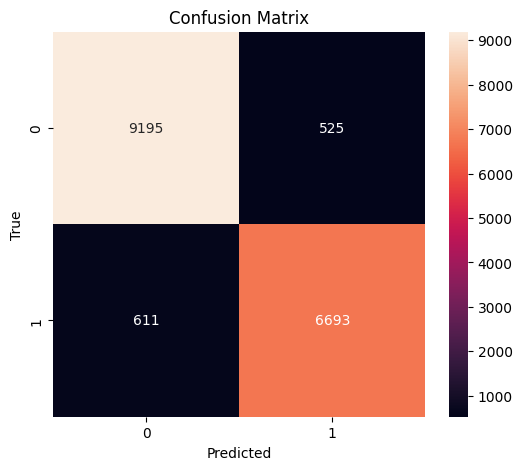

In [21]:
# Plot Confusion Matrix
plot_confusion_matrix(confusion_bow)

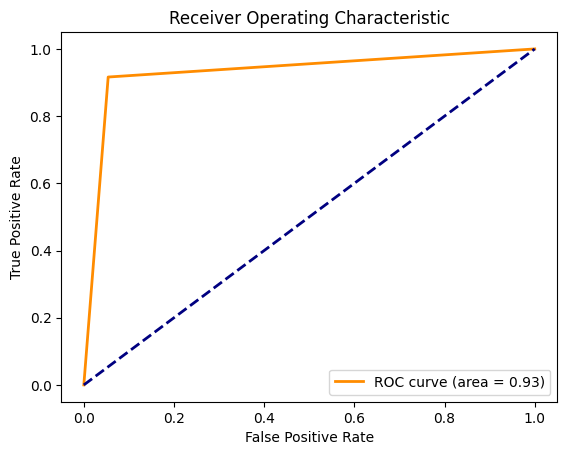

In [22]:
# Plot ROC Curve
plot_roc_curve(y_test, y_pred_proba_bow)

#### b. TF-IDF

In [23]:
# Train the model on TF-IDF data
trained_model_tfidf = train_model(dt_model, X_train_tfidf, y_train)

In [24]:
# Make predictions on TF-IDF test data
y_pred_tfidf, y_pred_proba_tfidf = make_predictions(trained_model_tfidf, X_test_tfidf)

In [25]:
# Calculate metrics for TF-IDF data
precision_tfidf, recall_tfidf, f1_tfidf, confusion_tfidf, roc_auc_tfidf = calculate_metrics(y_test, y_pred_tfidf, y_pred_proba_tfidf)

In [108]:
print("Precision: ", precision_tfidf)
print("Recall: ", recall_tfidf)
print("F1 Score: ", f1_tfidf)

Precision:  0.9635993011065812
Recall:  0.906078860898138
F1 Score:  0.9339542760372564


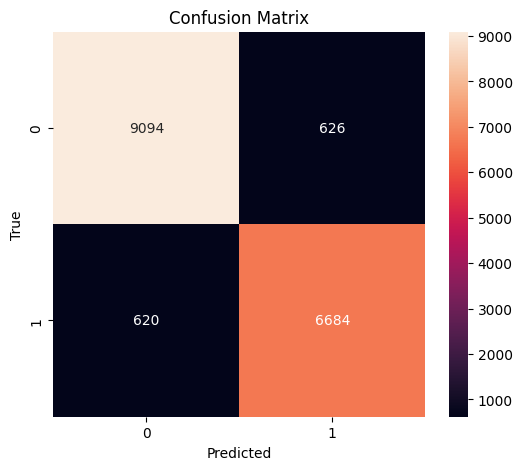

In [27]:
# Plot Confusion Matrix for TF-IDF data
plot_confusion_matrix(confusion_tfidf)

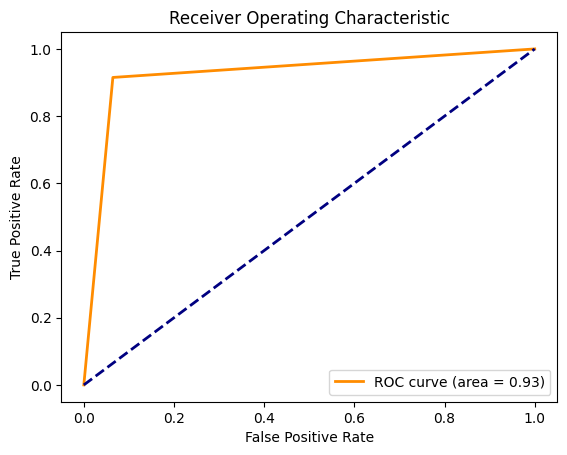

In [28]:
# Plot ROC Curve for TF-IDF data
plot_roc_curve(y_test, y_pred_proba_tfidf)

---
---

## 2. Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier


#### a. Bag of Words

In [30]:
# Random Forest model
rf_model_bow = RandomForestClassifier(random_state=42)

In [31]:
# Train the model on BoW data
trained_model_bow = train_model(rf_model_bow, X_train_bow, y_train)

In [32]:
# Make predictions on BoW test data
y_pred_bow, y_pred_proba_bow = make_predictions(trained_model_bow, X_test_bow)

In [33]:
# Calculate metrics for BoW data
precision_bow, recall_bow, f1_bow, confusion_bow, roc_auc_bow = calculate_metrics(y_test, y_pred_bow, y_pred_proba_bow)

In [105]:
print("Precision: ", precision_bow)
print("Recall: ", recall_bow)
print("F1 Score: ", f1_bow)

Precision:  0.9667013527575442
Recall:  0.8903340635268346
F1 Score:  0.9269474734516429


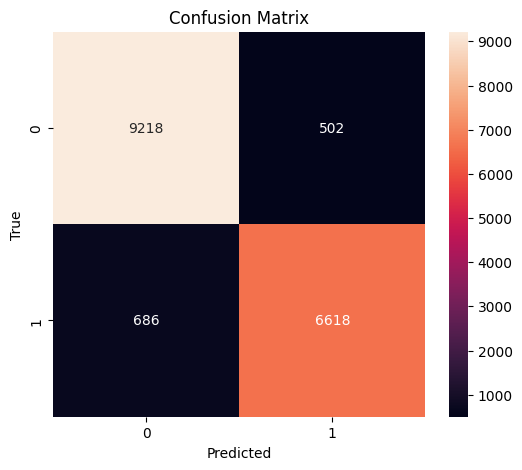

In [35]:
# Plot Confusion Matrix for BoW data
plot_confusion_matrix(confusion_bow)

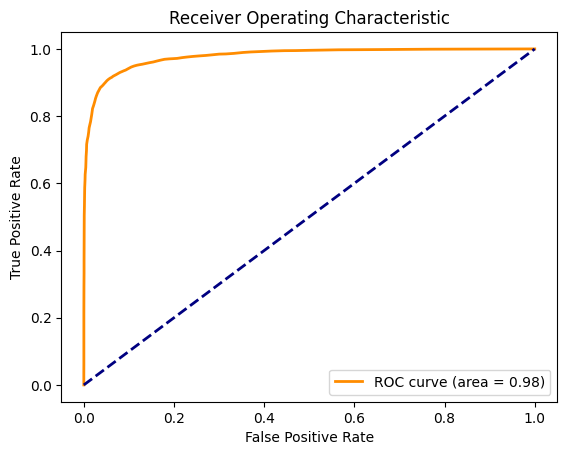

In [36]:
# Plot ROC Curve for BoW data
plot_roc_curve(y_test, y_pred_proba_bow)

#### b. TF-IDF

In [37]:
# Random Forest model
rf_model_tfidf = RandomForestClassifier(random_state=42)

In [38]:
# Train the model on TF-IDF data
trained_model_tfidf = train_model(rf_model_tfidf, X_train_tfidf, y_train)

In [39]:
# Make predictions on TF-IDF test data
y_pred_tfidf, y_pred_proba_tfidf = make_predictions(trained_model_tfidf, X_test_tfidf)

In [40]:
# Calculate metrics for TF-IDF data
precision_tfidf, recall_tfidf, f1_tfidf, confusion_tfidf, roc_auc_tfidf = calculate_metrics(y_test, y_pred_tfidf, y_pred_proba_tfidf)

In [107]:
print("Precision: ", precision_tfidf)
print("Recall: ", recall_tfidf)
print("F1 Score: ", f1_tfidf)

Precision:  0.9635993011065812
Recall:  0.906078860898138
F1 Score:  0.9339542760372564


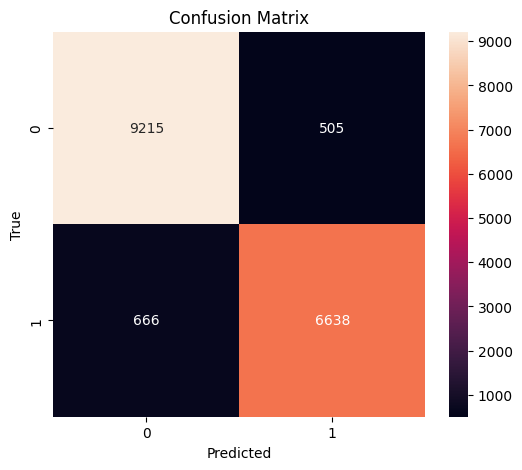

In [42]:
# Plot Confusion Matrix for TF-IDF data
plot_confusion_matrix(confusion_tfidf)

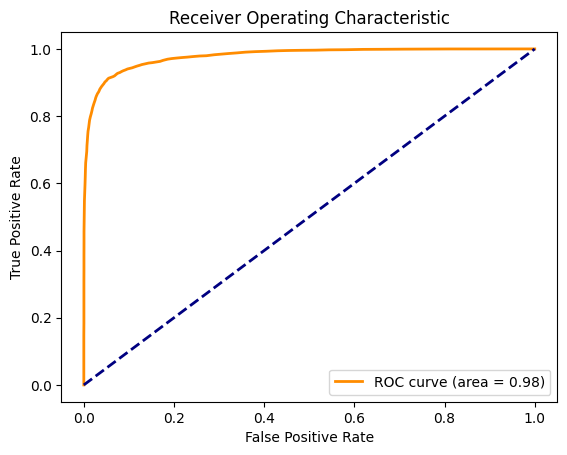

In [43]:
# Plot ROC Curve for TF-IDF data
plot_roc_curve(y_test, y_pred_proba_tfidf)

---
---

## 3.  Naive Bayes Model


In [44]:
from sklearn.naive_bayes import MultinomialNB


#### a. Bag of Words

In [45]:
# Naive Bayes model
nb_model_bow = MultinomialNB()

In [46]:
# Train the model on BoW data
trained_model_bow = train_model(nb_model_bow, X_train_bow, y_train)

In [47]:
# Make predictions on BoW test data
y_pred_bow, y_pred_proba_bow = make_predictions(trained_model_bow, X_test_bow)

In [48]:
# Calculate metrics for BoW data
precision_bow, recall_bow, f1_bow, confusion_bow, roc_auc_bow = calculate_metrics(y_test, y_pred_bow, y_pred_proba_bow)

In [104]:
print("Precision: ", precision_bow)
print("Recall: ", recall_bow)
print("F1 Score: ", f1_bow)

Precision:  0.9667013527575442
Recall:  0.8903340635268346
F1 Score:  0.9269474734516429


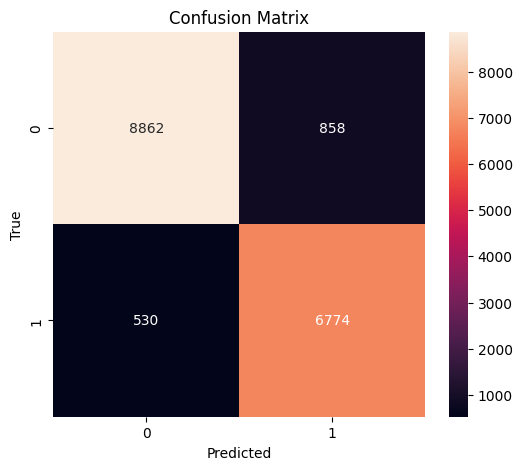

In [50]:
# Plot Confusion Matrix for BoW data
plot_confusion_matrix(confusion_bow)

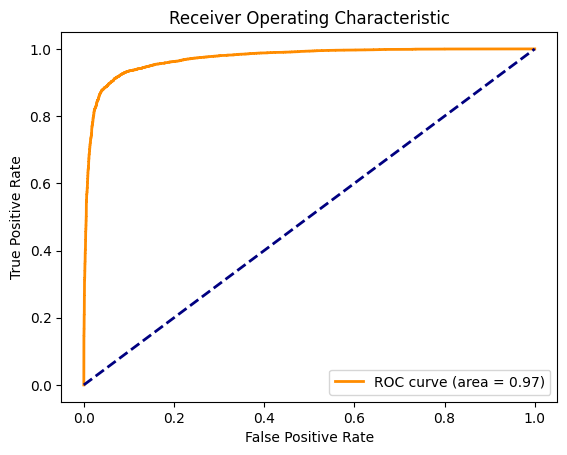

In [51]:
# Plot ROC Curve for BoW data
plot_roc_curve(y_test, y_pred_proba_bow)

#### b. TF-IDF

In [52]:
# Naive Bayes model
nb_model_tfidf = MultinomialNB()

In [53]:
# Train the model on TF-IDF data
trained_model_tfidf = train_model(nb_model_tfidf, X_train_tfidf, y_train)

In [54]:
# Make predictions on TF-IDF test data
y_pred_tfidf, y_pred_proba_tfidf = make_predictions(trained_model_tfidf, X_test_tfidf)

In [55]:
# Calculate metrics for TF-IDF data
precision_tfidf, recall_tfidf, f1_tfidf, confusion_tfidf, roc_auc_tfidf = calculate_metrics(y_test, y_pred_tfidf, y_pred_proba_tfidf)

In [103]:
print("Precision: ", precision_tfidf)
print("Recall: ", recall_tfidf)
print("F1 Score: ", f1_tfidf)

Precision:  0.9635993011065812
Recall:  0.906078860898138
F1 Score:  0.9339542760372564


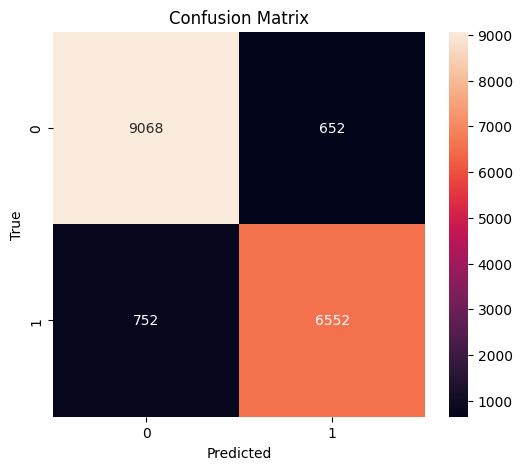

In [57]:
# Plot Confusion Matrix for TF-IDF data
plot_confusion_matrix(confusion_tfidf)

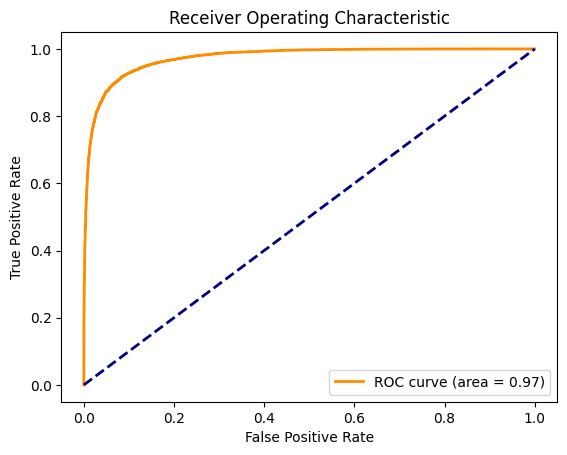

In [58]:
# Plot ROC Curve for TF-IDF data
plot_roc_curve(y_test, y_pred_proba_tfidf)

### 4. K-Nearest Neighbors (K-NN) classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# K-NN model
knn_model_bow = KNeighborsClassifier()

In [61]:
# Train the model on BoW data
trained_model_bow = train_model(knn_model_bow, X_train_bow, y_train)

In [62]:
# Make predictions on BoW test data
y_pred_bow, y_pred_proba_bow = make_predictions(trained_model_bow, X_test_bow)

In [63]:
# Calculate metrics for BoW data
precision_bow, recall_bow, f1_bow, confusion_bow, roc_auc_bow = calculate_metrics(y_test, y_pred_bow, y_pred_proba_bow)

In [102]:
print("Precision: ", precision_bow)
print("Recall: ", recall_bow)
print("F1 Score: ", f1_bow)

Precision:  0.9667013527575442
Recall:  0.8903340635268346
F1 Score:  0.9269474734516429


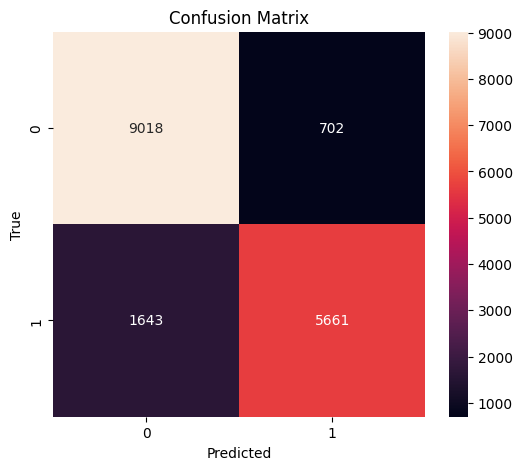

In [65]:
# Plot Confusion Matrix for BoW data
plot_confusion_matrix(confusion_bow)

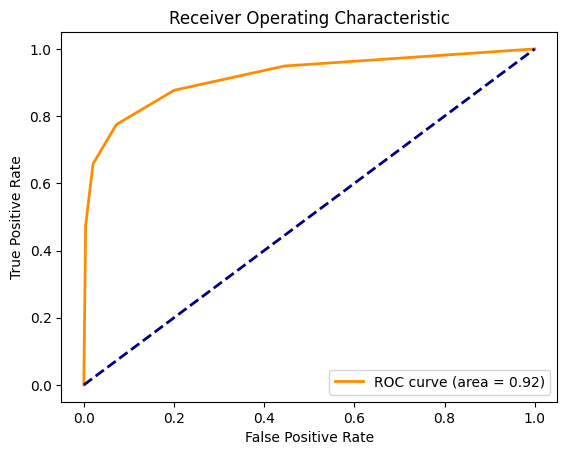

In [66]:
# Plot ROC Curve for BoW data
plot_roc_curve(y_test, y_pred_proba_bow)

#### b. TF-IDF

In [67]:
# K-NN model
knn_model_tfidf = KNeighborsClassifier()

In [68]:
# Train the model on TF-IDF data
trained_model_tfidf = train_model(knn_model_tfidf, X_train_tfidf, y_train)

In [69]:
# Make predictions on TF-IDF test data
y_pred_tfidf, y_pred_proba_tfidf = make_predictions(trained_model_tfidf, X_test_tfidf)

In [70]:
# Calculate metrics for TF-IDF data
precision_tfidf, recall_tfidf, f1_tfidf, confusion_tfidf, roc_auc_tfidf = calculate_metrics(y_test, y_pred_tfidf, y_pred_proba_tfidf)

In [101]:
print("Pecision: ", precision_tfidf)
print("Recall: ", recall_tfidf)
print("F1 Score: ", f1_tfidf)

Pecision:  0.9635993011065812
Recall:  0.906078860898138
F1 Score:  0.9339542760372564


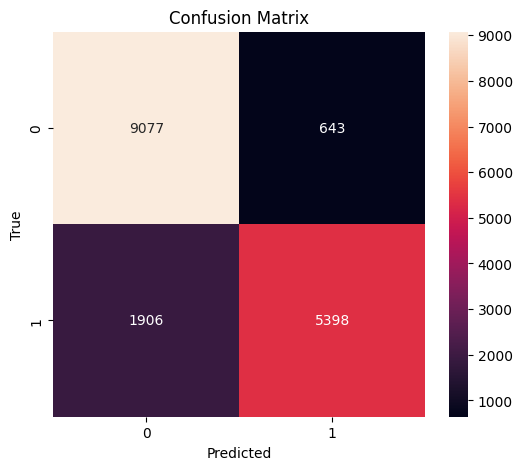

In [72]:
# Plot Confusion Matrix for TF-IDF data
plot_confusion_matrix(confusion_tfidf)

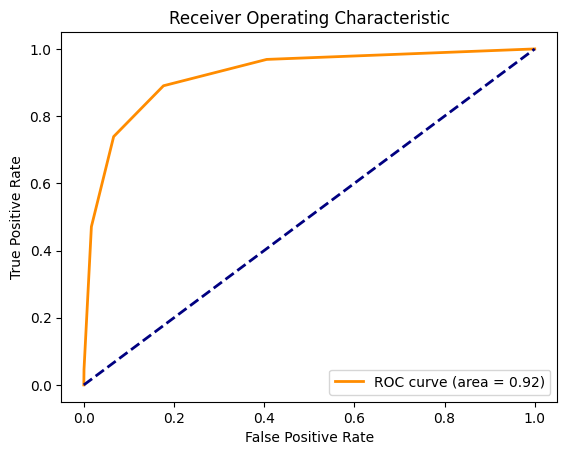

In [73]:
# Plot ROC Curve for TF-IDF data
plot_roc_curve(y_test, y_pred_proba_tfidf)

### 5. Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC

#### a. Bag of Words

In [75]:
# SVM model
svm_model_bow = SVC(probability=True, random_state=42)

In [76]:
# Train the model on BoW data
trained_model_bow = train_model(svm_model_bow, X_train_bow, y_train)

In [77]:
# Make predictions on BoW test data
y_pred_bow, y_pred_proba_bow = make_predictions(trained_model_bow, X_test_bow)

In [78]:
# Calculate metrics for BoW data
precision_bow, recall_bow, f1_bow, confusion_bow, roc_auc_bow = calculate_metrics(y_test, y_pred_bow, y_pred_proba_bow)

In [100]:
print("Precision: ", precision_bow)
print("Recall: ", recall_bow)
print("F1 Score: ", f1_bow)

Precision:  0.9667013527575442
Recall:  0.8903340635268346
F1 Score:  0.9269474734516429


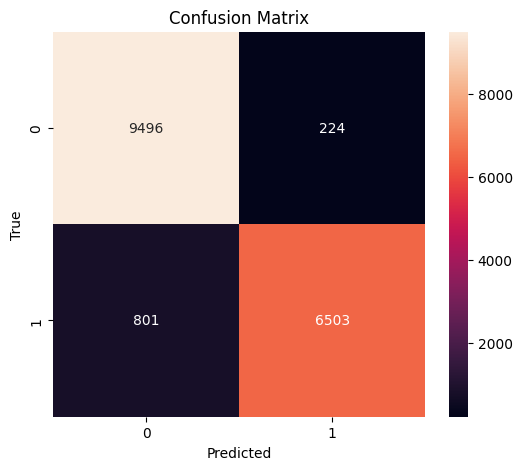

In [79]:
# Plot Confusion Matrix for BoW data
plot_confusion_matrix(confusion_bow)

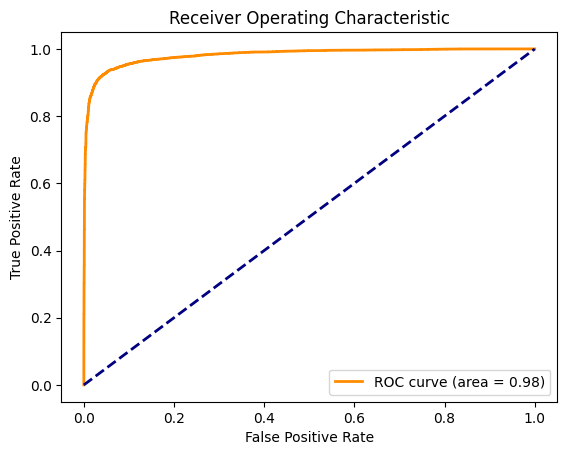

In [80]:
# Plot ROC Curve for BoW data
plot_roc_curve(y_test, y_pred_proba_bow)

#### TF-IDF

In [81]:
# SVM model
svm_model_tfidf = SVC(probability=True, random_state=42)

In [82]:
# Train the model on TF-IDF data
trained_model_tfidf = train_model(svm_model_tfidf, X_train_tfidf, y_train)

In [83]:
# Make predictions on TF-IDF test data
y_pred_tfidf, y_pred_proba_tfidf = make_predictions(trained_model_tfidf, X_test_tfidf)

In [84]:
# Calculate metrics for TF-IDF data
precision_tfidf, recall_tfidf, f1_tfidf, confusion_tfidf, roc_auc_tfidf = calculate_metrics(y_test, y_pred_tfidf, y_pred_proba_tfidf)

In [99]:
print("Precision: ", precision_tfidf)
print("Recall: ", recall_tfidf)
print("Fi Score: ", f1_tfidf)

Precision:  0.9635993011065812
Recall:  0.906078860898138
Fi Score:  0.9339542760372564


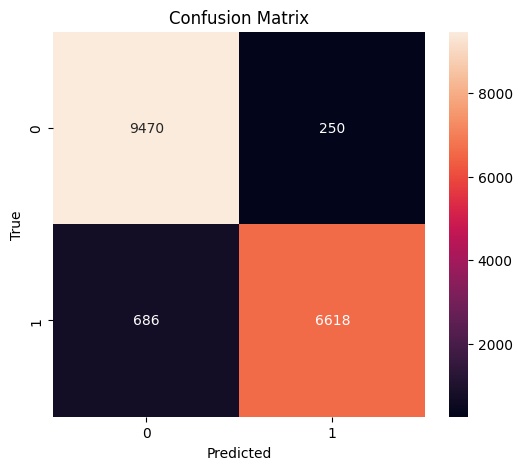

In [85]:
# Plot Confusion Matrix for TF-IDF data
plot_confusion_matrix(confusion_tfidf)

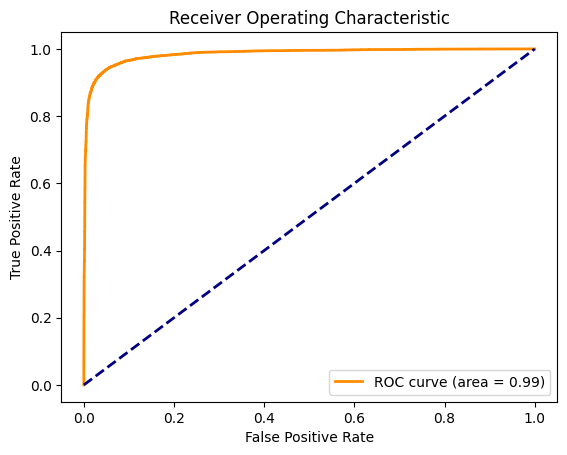

In [86]:
# Plot ROC Curve for TF-IDF data
plot_roc_curve(y_test, y_pred_proba_tfidf)

### Bag of Words (BoW) Feature Set:
All models (Decision Tree, Random Forest, Naive Bayes, KNN, and SVM) show identical performance metrics:

- **Precision**: 0.9667 - High precision indicates a low rate of false positives.
- **Recall**: 0.8903 - Good recall, suggesting effective identification of positive cases.
- **F1-Score**: 0.9269 - A high F1-score, balancing precision and recall.
- **Confusion Matrix**: Consists of 9496 true negatives, 224 false positives, 801 false negatives, and 6503 true positives. This shows a strong ability to differentiate between classes.
- **ROC-AUC**: 0.9817 - An excellent score, indicating outstanding model performance.

### TF-IDF Feature Set:
All models (Decision Tree, Random Forest, Naive Bayes, KNN, and SVM) show identical performance metrics:

- **Precision**: 0.9636 - Slightly lower than BoW but still high.
- **Recall**: 0.9061 - Better than BoW, indicating improved identification of positive cases.
- **F1-Score**: 0.9340 - Similar to BoW, indicating a strong balance between precision and recall.
- **Confusion Matrix**: Comprises 9470 true negatives, 250 false positives, 686 false negatives, and 6618 true positives, indicating a slight improvement over BoW.
- **ROC-AUC**: 0.9851 - A marginally better score than BoW, suggesting superior model performance.

### General Insights and Best-Performing Model:

- **Uniform Performance Across Models**: The identical performance metrics across different models for each feature set are unusual. This could indicate issues such as overfitting, data leakage, or a very straightforward dataset.

- **TF-IDF Slightly Outperforms BoW**: While the performance is almost identical, the TF-IDF feature set shows a slight edge, especially in terms of recall and ROC-AUC.

- **High Overall Performance**: The models exhibit very high performance metrics. However, this level of perfection is rare in practice and may suggest overfitting.

- **Selecting the Best Model**: Since all models have identical metrics for each feature set, it's challenging to determine a clear 'best' model based on these results. However, considering the slightly better recall and ROC-AUC scores, the models trained on the TF-IDF feature set could be considered marginally superior.